#Detecting Fraudulent Transactions


#importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#reading the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Payment_Data.csv')
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


#information about the dataset

In [ ]:
#rows and column check
rows, columns = data.shape
print(f'Dataset has {rows} rows and {columns} columns.')

Dataset has 39221 rows and 8 columns.


In [ ]:
#data information check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


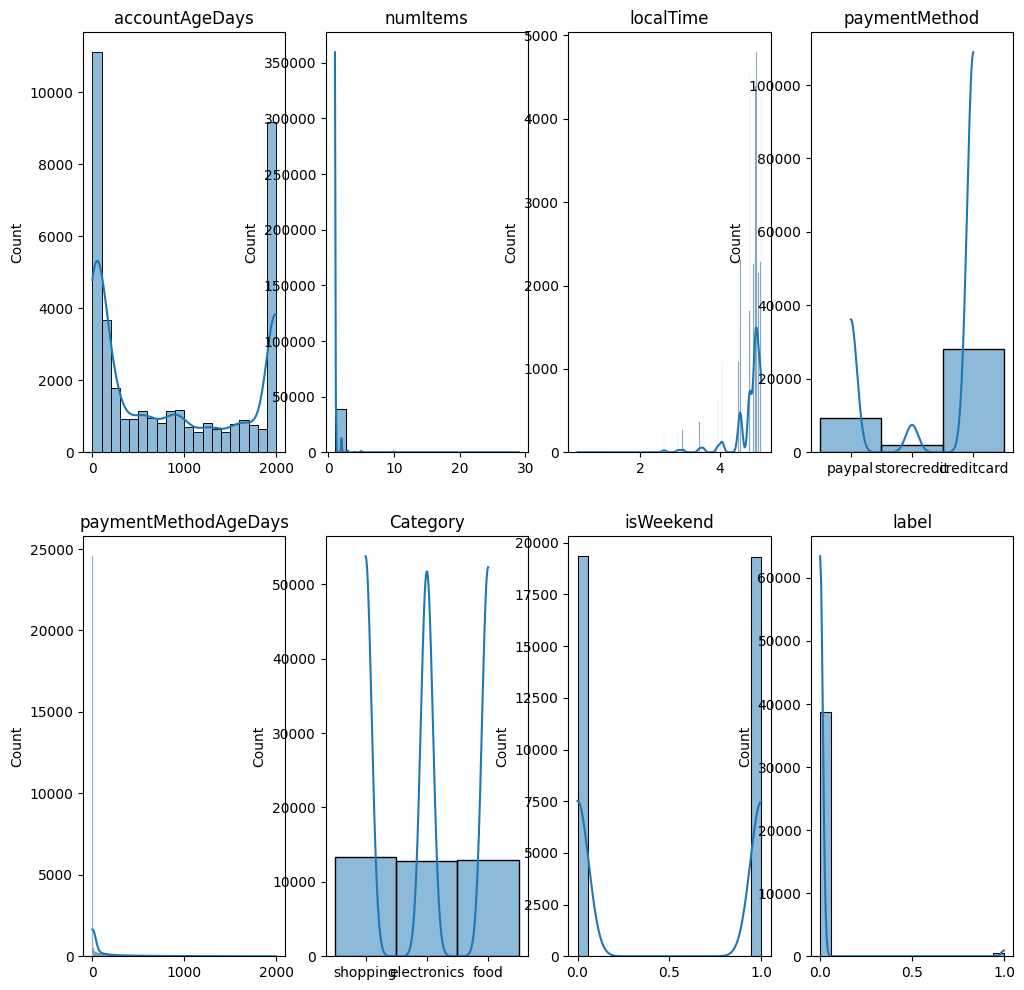

In [ ]:
#Let us Visualize the columns and analyze the distributions
num_cols = 4
num_rows = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a histogram
for i, column in enumerate(data.columns):
    ax = axes[i]
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

# Display the plot
plt.show()


In [ ]:
# value count of each column value
for i in (data):
  print()
  print(data[i].value_counts(normalize = True))



accountAgeDays
2000    0.209378
2       0.031692
3       0.018434
1       0.014278
4       0.012162
          ...   
1399    0.000025
1389    0.000025
1471    0.000025
1815    0.000025
1512    0.000025
Name: proportion, Length: 1999, dtype: float64

numItems
1     0.953520
2     0.034369
5     0.004283
3     0.004181
10    0.001810
4     0.001071
6     0.000382
8     0.000127
7     0.000127
12    0.000025
15    0.000025
29    0.000025
9     0.000025
11    0.000025
Name: proportion, dtype: float64

localTime
4.921318    0.062314
4.921349    0.059993
4.876771    0.059483
4.886641    0.058974
5.034622    0.058897
4.524580    0.058693
4.748314    0.058234
5.017904    0.058030
4.745402    0.057724
4.836982    0.057444
4.962055    0.057214
4.965339    0.054945
4.895263    0.053058
5.040929    0.052268
4.742303    0.043242
4.505662    0.039035
4.057414    0.027740
4.461622    0.027613
3.954522    0.016471
3.575983    0.011295
3.483951    0.009306
3.066058    0.006731
2.948940    0.005813
2.5

In [ ]:
#visualizing value count of paymentMethodAgeDays column
abc = data['paymentMethodAgeDays'].value_counts(normalize = True) >= 0.36
for i in (abc):
  if i == True:
    print(i)

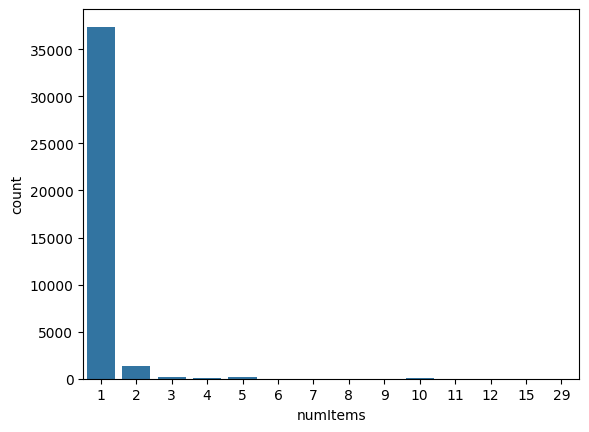

In [ ]:
sns.countplot(x = 'numItems', data = data)
plt.show()

In [ ]:
#numItems is having 95% of the value in 1 category
data.pop('numItems')

0        1
1        1
2        1
3        1
4        1
        ..
39216    1
39217    1
39218    1
39219    1
39220    1
Name: numItems, Length: 39221, dtype: int64

In [ ]:
#duplicate check
data.duplicated().sum()

3200

this is transaction dataset, so it is possible to have duplicates

#converting local time into timeframe of 24 hrs

In [ ]:
def time_convert (time_float):
  hrs = int(time_float)
  min = int((time_float - hrs) *60)

  return f"{hrs:02}.{min:02}"

In [ ]:
data['localTime'] = data['localTime'].apply(time_convert)

In [ ]:
data.head()

,accountAgeDays,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,04.44,paypal,28.204861,shopping,0.0,0
1,725,04.44,storecredit,0.000000,electronics,0.0,0
2,845,04.55,creditcard,0.000000,food,1.0,0
3,503,04.53,creditcard,0.000000,electronics,1.0,0
4,2000,05.02,creditcard,0.000000,shopping,0.0,0


In [ ]:
data['localTime'].unique()

array(['04.44', '04.55', '04.53', '05.02', '04.57', '04.52', '04.27',
       '04.30', '04.50', '04.03', '03.29', '02.35', '05.01', '04.31',
       '02.56', '03.03', '03.34', '03.57', '00.25'], dtype=object)

In [ ]:
data['localTime'].value_counts()

localTime
04.44    6244
04.55    4797
04.57    4399
04.53    4394
05.02    4360
04.52    2333
04.31    2302
05.01    2276
04.50    2253
04.30    1531
04.03    1088
04.27    1083
03.57     646
03.34     443
03.29     365
03.03     264
02.56     228
02.35     213
00.25       2
Name: count, dtype: int64

the time  is within the frame of 12am to 6am and 80% time is between 4am to 5.30am

In [ ]:
data.pop('localTime')

0        04.44
1        04.44
2        04.55
3        04.53
4        05.02
         ...  
39216    04.50
39217    04.52
39218    04.44
39219    04.55
39220    05.02
Name: localTime, Length: 39221, dtype: object

#Findings from data that all the fradulent transactions belongs to  'accountAgeDays' == 1 and 'isWeekend' == null

In [ ]:
#imputing the missing values
data['isWeekend'].fillna('blank',inplace = True)
data['Category'] = data['Category'].fillna(data['Category'].mode()[0])

In [ ]:
data['isWeekend'].value_counts()

isWeekend
0.0      19348
1.0      19313
blank      560
Name: count, dtype: int64

In [ ]:
# creating dummies for easy processing

data = pd.get_dummies(data, columns=['isWeekend','paymentMethod','Category'],dtype=int, drop_first=True)
data.head()


,accountAgeDays,paymentMethodAgeDays,label,isWeekend_1.0,isWeekend_blank,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,29,28.204861,0,0,0,1,0,0,1
1,725,0.000000,0,0,0,0,1,0,0
2,845,0.000000,0,1,0,0,0,1,0
3,503,0.000000,0,1,0,0,0,0,0
4,2000,0.000000,0,0,0,0,0,0,1


In [ ]:
#data summary
data.describe()

,accountAgeDays,paymentMethodAgeDays,label,isWeekend_1.0,isWeekend_blank,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,122.641326,0.014278,0.492415,0.014278,0.237194,0.048800,0.330537,0.342240
std,804.788212,283.569177,0.118636,0.499949,0.118636,0.425368,0.215453,0.470413,0.474466
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,603.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1804.000000,87.510417,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2000.000000,1999.580556,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#multicollinearity check

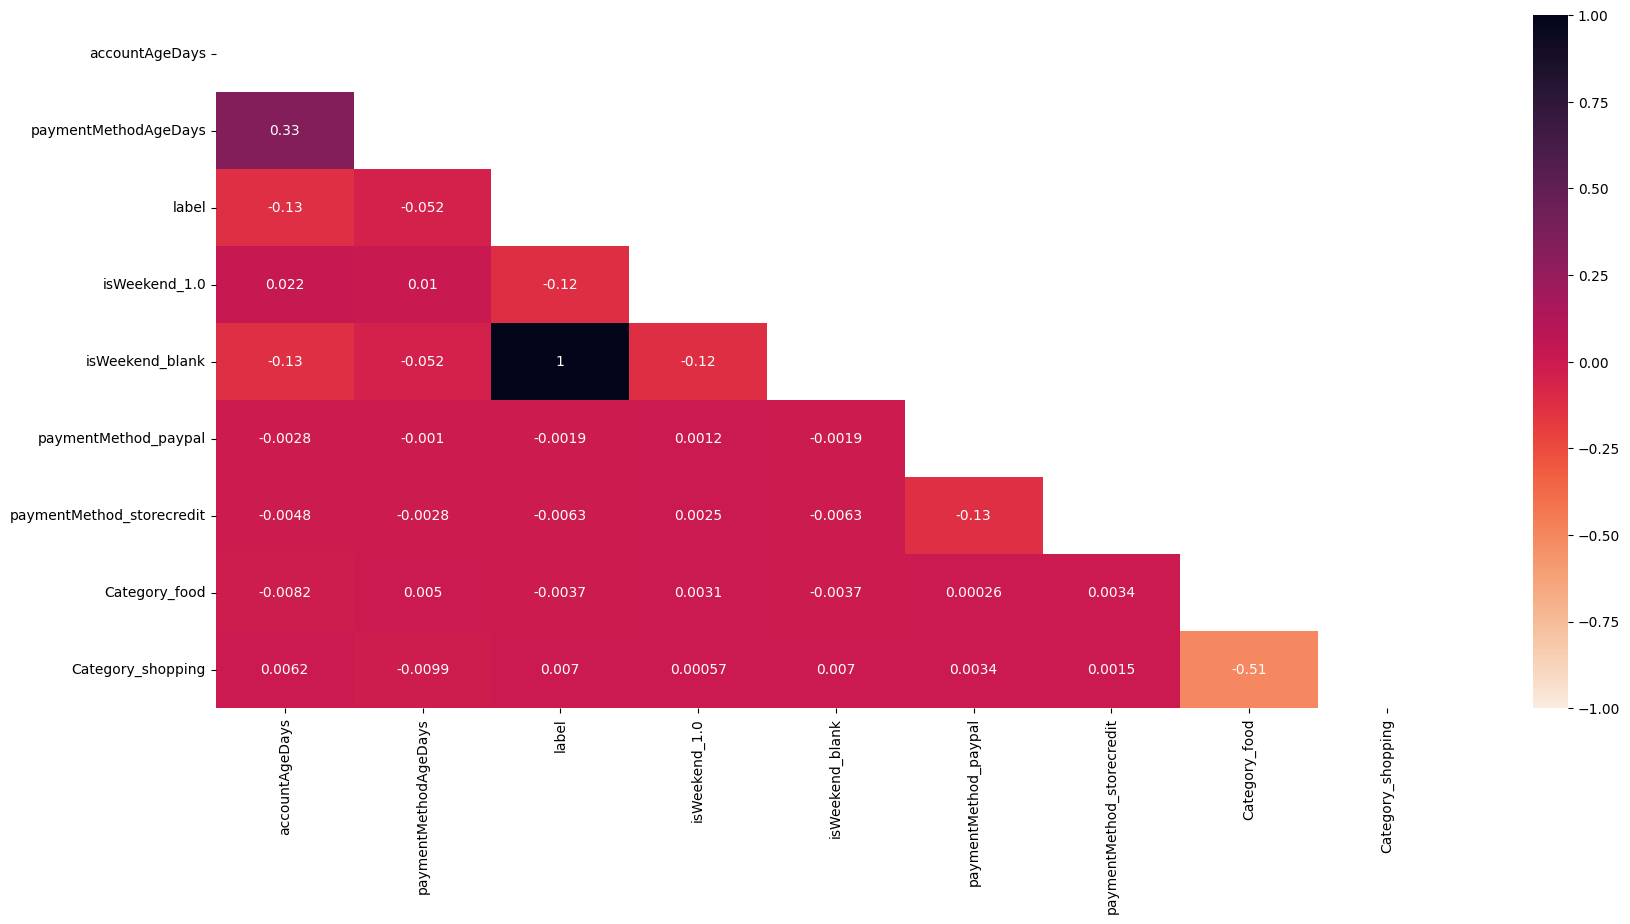

In [ ]:
# Get the correlation matrix
plt.figure(figsize=(20,9))

corr = data.corr()
mask = np.triu(corr)

# Create a heatmap
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='rocket_r',mask = mask)

# Display the heatmap
plt.show()


#outliers check

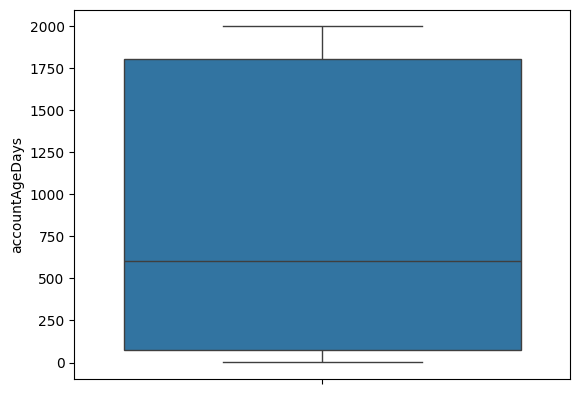

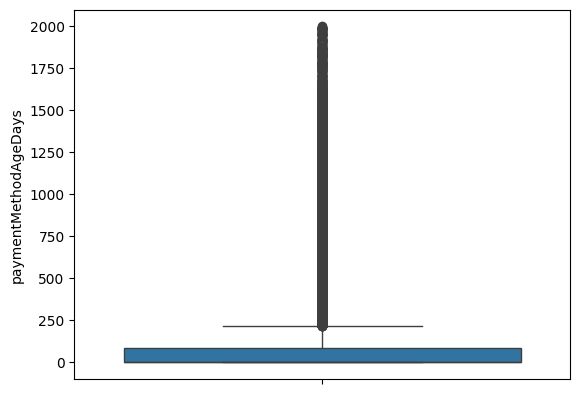

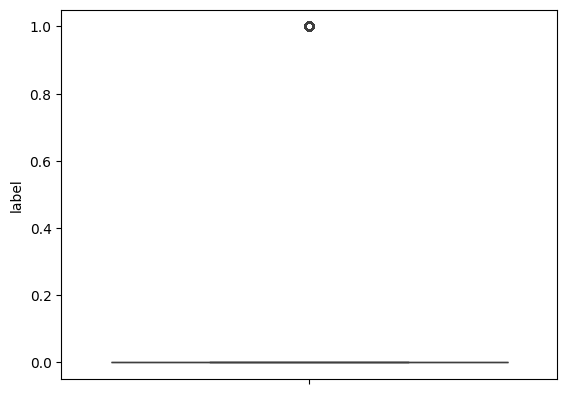

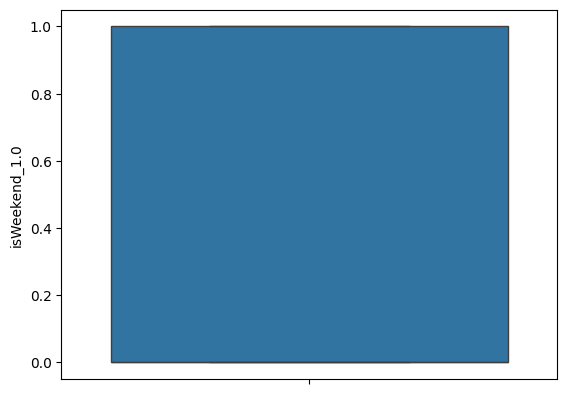

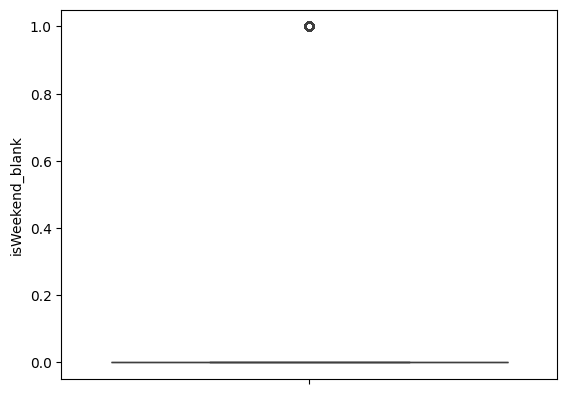

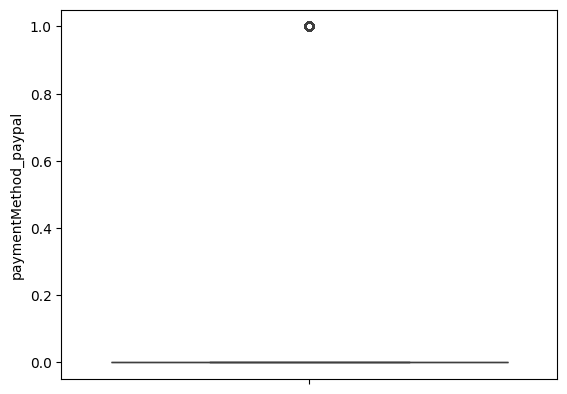

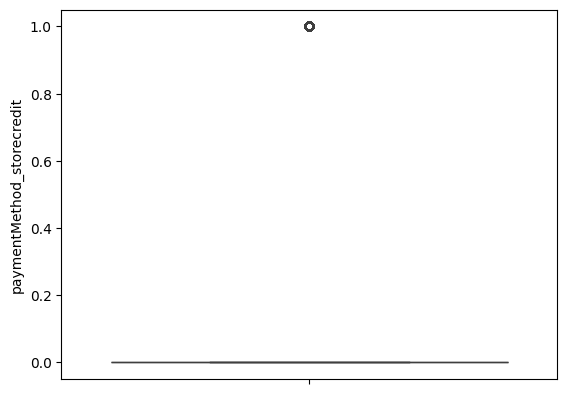

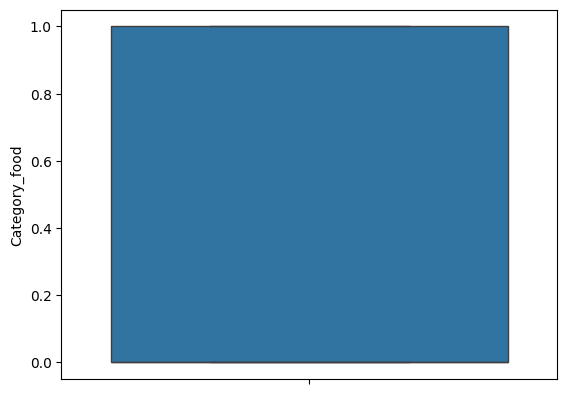

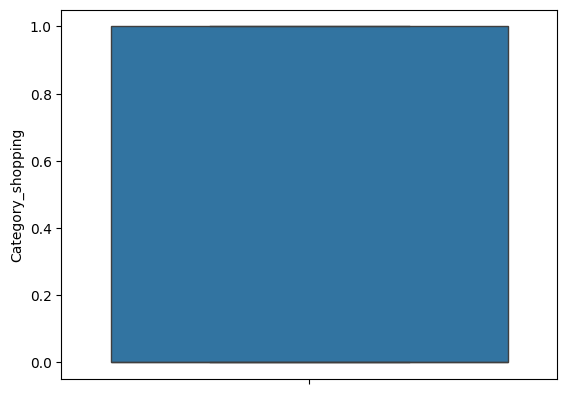

In [ ]:
def distplots(col):
  sns.boxplot(data[col])
  plt.show()

for i in list(data.columns)[0:]:
  distplots(i)

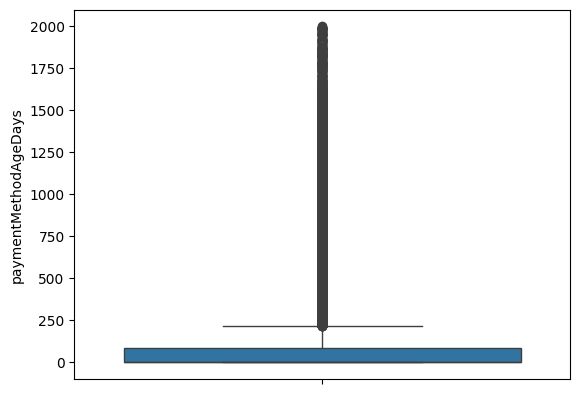

In [ ]:
# Create a boxplot of the data
sns.boxplot(data=data['paymentMethodAgeDays'])
plt.show()

In [ ]:
#imputing outlier
coulmn_name = 'paymentMethodAgeDays'
q1 = data[coulmn_name].quantile(0.25)
q3 = data[coulmn_name].quantile(0.25)
iqr = q3 -q1

ll = q1 -1.5 *iqr
ul = q3 + 1.5 * iqr

outliers = data[(data[coulmn_name] < ll) | (data[coulmn_name]> ul)]

median_v = data[coulmn_name].median()
data.loc[outliers.index,coulmn_name] = median_v

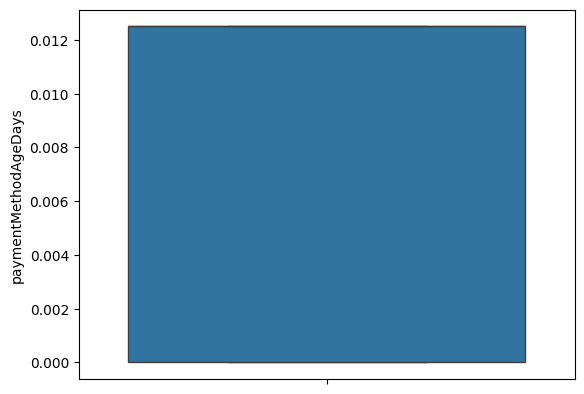

In [ ]:
# Create a boxplot of the data
sns.boxplot(data=data['paymentMethodAgeDays'])
plt.show()


#seperating the target column


In [ ]:
x = data.drop(['label'],axis= 1)
y = data['label']


In [ ]:
x.columns

Index(['accountAgeDays', 'paymentMethodAgeDays', 'isWeekend_1.0',
       'isWeekend_blank', 'paymentMethod_paypal', 'paymentMethod_storecredit',
       'Category_food', 'Category_shopping'],
      dtype='object')

# feature scaling

In [ ]:
#creating copy of features
copy_x = x

In [ ]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
copy_x.iloc[:,0:2] = scaler.fit_transform(copy_x.iloc[:,0:2])
copy_x.head()


,accountAgeDays,paymentMethodAgeDays,isWeekend_1.0,isWeekend_blank,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,-1.029556,0.741202,0,0,1,0,0,1
1,-0.164721,-1.349161,0,0,0,1,0,0
2,-0.015612,-1.349161,1,0,0,0,1,0
3,-0.440574,-1.349161,1,0,0,0,0,0
4,1.419567,-1.349161,0,0,0,0,0,1


#variance check

In [ ]:
# Variance of the amount column
variance_amount = np.var(copy_x)
print(variance_amount)


accountAgeDays               1.000000
paymentMethodAgeDays         1.000000
isWeekend_1.0                0.249942
isWeekend_blank              0.014074
paymentMethod_paypal         0.180933
paymentMethod_storecredit    0.046419
Category_food                0.221282
Category_shopping            0.225112
dtype: float64


#target column visualization

label
0    0.985722
1    0.014278
Name: proportion, dtype: float64



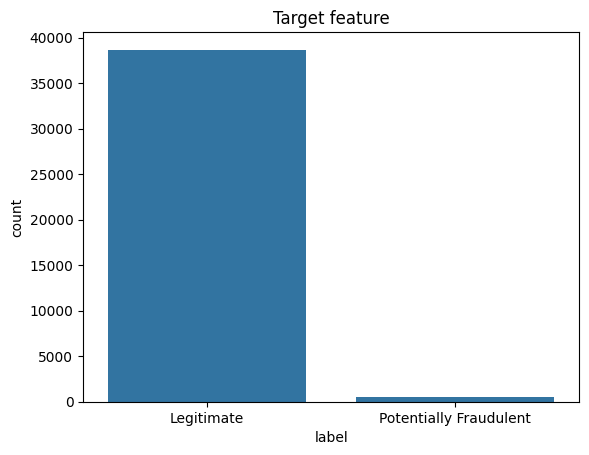

In [ ]:
print(y.value_counts(normalize = True))
print()
sns.countplot(x = 'label', data = data)
plt.xticks(ticks = [0,1], labels = ['Legitimate','Potentially Fraudulent'])
plt.title('Target feature')
plt.show()



#spliting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(copy_x, y, test_size=0.30, random_state=42)

#balancing target class

In [ ]:
#fixing imblanced data set with smote
healthy = data[data["label"]==0]
fraudulent  = data [data["label"]== 1]

print('previous shape ',fraudulent.shape,healthy.shape)

from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state = 42)
x_sm,y_sm = smk.fit_resample(X_train,y_train)

print('new shap ',x_sm.shape,y_sm.shape)

previous shape  (560, 9) (38661, 9)
new shap  (54132, 8) (54132,)


#Model Building

#Logistic Regression

In [ ]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Define the Models
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()

# Step 3: Set Up the Parameter Grid
param_grid = {
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'lasso': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'elastic_net': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
        'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
    }
}

# Step 4: Use Cross-Validation
models = {
    'ridge': GridSearchCV(ridge, param_grid['ridge'], cv=5),
    'lasso': GridSearchCV(lasso, param_grid['lasso'], cv=5),
    'elastic_net': GridSearchCV(elastic_net, param_grid['elastic_net'], cv=5)
}

best_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    best_models[name] = model.best_estimator_

# Step 5: Evaluate and Select the Best Model
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test,y_pred)
    print(f"{name} model - Best Params: {model.get_params()}")
    print(f"{name} model - Mean Squared Error: {mse}")
    print(f'R-squared : {r_squared}\n')


ridge model - Best Params: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
ridge model - Mean Squared Error: 1.0154185232539465e-11
R-squared : 0.999999999295019

lasso model - Best Params: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
lasso model - Mean Squared Error: 0.007420496646469446
R-squared : 0.48481254390576156

elastic_net model - Best Params: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
elastic_net model - Mean Squared Error: 0.002735924279825724
R-squared : 0.8100512759532746



In [ ]:
reg = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0.1, solver = 'saga')

# train the model using the training sets
reg.fit(x_sm,y_sm)

# predictions on the testing set
y_lr = reg.predict(X_test)
# predictions on the training set
y_lr_train = reg.predict(x_sm)

#accuracy
acc_lr_train = (accuracy_score(y_sm, y_lr_train)*100) #training
acc_lr = (accuracy_score(y_test, y_lr)*100) #testing

print("Accuracy for training :", acc_lr_train,'\n',"Accuracy for testing :", acc_lr)
print()
print()

#confusion matrix
from sklearn.metrics import confusion_matrix
#for testing
cnf_matrix= confusion_matrix(y_test,y_lr)
print('confusion matrix for testing','\n',cnf_matrix)
print()
print()
#for training
cnf_matrix_train = confusion_matrix(y_sm,y_lr_train)
print('confusion matrix for training','\n',cnf_matrix_train)
print()
print()

#classification_report testing
print('classification_report testing','\n',classification_report(y_test,y_lr))
print()
print()
#classification_report training
print('classification_report training','\n',classification_report(y_sm,y_lr_train))
print()
print()
# Calculate the bias
bias = np.mean(y_lr - y_test)

# Calculate the variance
variance = np.mean((y_lr - y_test)**2)

print(f"bias is {bias} and the variance is {variance}")

Accuracy for training : 100.0 
 Accuracy for testing : 100.0


confusion matrix for testing 
 [[11595     0]
 [    0   172]]


confusion matrix for training 
 [[27066     0]
 [    0 27066]]


classification_report testing 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11595
           1       1.00      1.00      1.00       172

    accuracy                           1.00     11767
   macro avg       1.00      1.00      1.00     11767
weighted avg       1.00      1.00      1.00     11767



classification_report training 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27066
           1       1.00      1.00      1.00     27066

    accuracy                           1.00     54132
   macro avg       1.00      1.00      1.00     54132
weighted avg       1.00      1.00      1.00     54132



bias is 0.0 and the variance is 0.0


#Random Forest

In [ ]:
# import the necessary libraries
from sklearn.ensemble import RandomForestClassifier

#Random Forest
rf = RandomForestClassifier()
rf.fit(x_sm,y_sm)

# predictions on the testing set
y_rf = rf.predict(X_test)
# predictions on the training set
y_rf_train = rf.predict(x_sm)

#accuracy
acc_rf_train = (accuracy_score(y_sm, y_rf_train)*100) #training
acc_rf = (accuracy_score(y_test, y_rf)*100) #testing

print("Accuracy for training :", acc_rf_train,'\n',"Accuracy for testing :", acc_rf)
print()
print()

#confusion matrix
from sklearn.metrics import confusion_matrix
#for testing
cnf_matrix= confusion_matrix(y_test,y_rf)
print('confusion matrix for testing','\n',cnf_matrix)
print()
print()
#for training
cnf_matrix_train= confusion_matrix(y_sm,y_rf_train)
print('confusion matrix for training','\n',cnf_matrix_train)
print()
print()

#classification_report testing
print('classification_report testing','\n',classification_report(y_test,y_rf))
print()
print()
#classification_report training
print('classification_report training','\n',classification_report(y_sm,y_rf_train))

print()
print()
# Calculate the bias
bias = np.mean(y_rf - y_test)

# Calculate the variance
variance = np.mean((y_rf - y_test)**2)

print(f"bias is {bias} and the variance is {variance}")


Accuracy for training : 100.0 
 Accuracy for testing : 100.0


confusion matrix for testing 
 [[11595     0]
 [    0   172]]


confusion matrix for training 
 [[27066     0]
 [    0 27066]]


classification_report testing 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11595
           1       1.00      1.00      1.00       172

    accuracy                           1.00     11767
   macro avg       1.00      1.00      1.00     11767
weighted avg       1.00      1.00      1.00     11767



classification_report training 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27066
           1       1.00      1.00      1.00     27066

    accuracy                           1.00     54132
   macro avg       1.00      1.00      1.00     54132
weighted avg       1.00      1.00      1.00     54132



bias is 0.0 and the variance is 0.0


#feature importance using random forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators = 100 , random_state = 42)
rf_classifier.fit(x,y)

print('feature importance')
for i , importance in enumerate(rf_classifier.feature_importances_):
  print(f"feature {i +1 }: {importance}")

feature importance
feature 1: 0.48713266821478696
feature 2: 0.0005651083852047309
feature 3: 0.004675563134324352
feature 4: 0.5075700241958172
feature 5: 1.0537237293586952e-05
feature 6: 1.9649771018990387e-05
feature 7: 8.368713439102485e-06
feature 8: 1.8080348115058575e-05


#XGBoost

In [ ]:
import xgboost as xgb

# Train model
model = xgb.XGBClassifier(n_estimators=100, random_state=42).fit(x_sm, y_sm)

# Predict
y_pred = model.predict(X_test)
y_pred_train = model.predict(x_sm)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
acuuracy_train = accuracy_score(y_sm , y_pred_train)
print("Accuracy testing:", accuracy * 100)
print("Accuracy training:", acuuracy_train * 100)
print()

# Print feature importances
importances = model.feature_importances_
for i, importance in enumerate(importances):
    print(f"Feature {i + 1}: {importance}")
print()
print()

#confusion matrix
from sklearn.metrics import confusion_matrix
#for testing
cnf_matrix= confusion_matrix(y_test,y_pred)
print('confusion matrix for testing','\n',cnf_matrix)
print()
print()
#for training
cnf_matrix_train = confusion_matrix(y_sm,y_pred_train)
print('confusion matrix for training','\n',cnf_matrix_train)
print()
print()

#classification_report testing
print('classification_report testing','\n',classification_report(y_test,y_pred))
print()
print()
#classification_report training
print('classification_report training','\n',classification_report(y_sm,y_pred_train))

print()
print()
# Calculate the bias
bias = np.mean(y_pred - y_test)

# Calculate the variance
variance = np.mean((y_pred - y_test)**2)

print(f"bias is {bias} and the variance is {variance}")

Accuracy testing: 100.0
Accuracy training: 100.0

Feature 1: 1.0
Feature 2: 0.0
Feature 3: 0.0
Feature 4: 0.0
Feature 5: 0.0
Feature 6: 0.0
Feature 7: 0.0
Feature 8: 0.0


confusion matrix for testing 
 [[11595     0]
 [    0   172]]


confusion matrix for training 
 [[27066     0]
 [    0 27066]]


classification_report testing 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11595
           1       1.00      1.00      1.00       172

    accuracy                           1.00     11767
   macro avg       1.00      1.00      1.00     11767
weighted avg       1.00      1.00      1.00     11767



classification_report training 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27066
           1       1.00      1.00      1.00     27066

    accuracy                           1.00     54132
   macro avg       1.00      1.00      1.00     54132
weighted avg       1.00      1.00

#Early stopping

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs= 10, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/10
981/981 [==============================] - 5s 3ms/step - loss: 0.0271 - accuracy: 0.9939 - val_loss: 2.4917e-04 - val_accuracy: 1.0000
Epoch 2/10
981/981 [==============================] - 2s 2ms/step - loss: 8.2906e-05 - accuracy: 1.0000 - val_loss: 1.6227e-05 - val_accuracy: 1.0000
Epoch 3/10
981/981 [==============================] - 2s 2ms/step - loss: 7.9183e-06 - accuracy: 1.0000 - val_loss: 4.3241e-06 - val_accuracy: 1.0000
Epoch 4/10
981/981 [==============================] - 2s 2ms/step - loss: 2.7836e-06 - accuracy: 1.0000 - val_loss: 1.9019e-06 - val_accuracy: 1.0000
Epoch 5/10
981/981 [==============================] - 3s 3ms/step - loss: 1.3338e-06 - accuracy: 1.0000 - val_loss: 9.7530e-07 - val_accuracy: 1.0000
Epoch 6/10
981/981 [==============================] - 4s 4ms/step - loss: 7.1042e-07 - accuracy: 1.0000 - val_loss: 5.3355e-07 - val_accuracy: 1.0000
Epoch 7/10
981/981 [==============================] - 2s 2ms/step - loss: 3.9883e-07 - accuracy: 1.0000 

#SVM

In [ ]:
# import the necessary libraries
from sklearn.svm import SVC
#from sklearn import metrics
from sklearn import svm
#SVM
clf = svm.SVC()
clf.fit(x_sm,y_sm)

# predictions on the testing set
y_svm = clf.predict(X_test)
# predictions on the training set
y_svm_train = clf.predict(x_sm)

#accuracy
acc_svm_train = (accuracy_score(y_sm, y_svm_train)*100) #training
acc_svm = (accuracy_score(y_test, y_svm)*100) #testing

print("Accuracy for training :", acc_svm_train,'\n',"Accuracy for testing :", acc_svm)
print()
print()

#confusion matrix
from sklearn.metrics import confusion_matrix
#for testing
cnf_matrix= confusion_matrix(y_test,y_svm)
print('confusion matrix for testing','\n',cnf_matrix)
print()
print()
#for training
cnf_matrix_train= confusion_matrix(y_sm,y_svm_train)
print('confusion matrix for training','\n',cnf_matrix_train)
print()
print()

#classification_report testing
print('classification_report testing','\n',classification_report(y_test,y_svm))
print()
print()
#classification_report training
print('classification_report training','\n',classification_report(y_sm,y_svm_train))

print()
print()
# Calculate the bias
bias = np.mean(y_sm - y_test)

# Calculate the variance
variance = np.mean((y_sm - y_test)**2)

print(f"bias is {bias} and the variance is {variance}")

Accuracy for training : 100.0 
 Accuracy for testing : 100.0


confusion matrix for testing 
 [[11595     0]
 [    0   172]]


confusion matrix for training 
 [[27066     0]
 [    0 27066]]


classification_report testing 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11595
           1       1.00      1.00      1.00       172

    accuracy                           1.00     11767
   macro avg       1.00      1.00      1.00     11767
weighted avg       1.00      1.00      1.00     11767



classification_report training 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27066
           1       1.00      1.00      1.00     27066

    accuracy                           1.00     54132
   macro avg       1.00      1.00      1.00     54132
weighted avg       1.00      1.00      1.00     54132



bias is 0.30016146851363984 and the variance is 0.31834792215517976


#svm using hyperparameter tunning

In [ ]:
# prompt: hyperparameter tunning for svm

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(x_sm, y_sm)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred_svm = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
best_params

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
# import the necessary libraries
from sklearn.svm import SVC
#from sklearn import metrics
from sklearn import svm
#SVM
clf = svm.SVC( C= 0.1, gamma= 0.1, kernel= 'linear')
clf.fit(x_sm,y_sm)

# predictions on the testing set
y_svm = clf.predict(X_test)
# predictions on the training set
y_svm_train = clf.predict(x_sm)

#accuracy
acc_svm_train = (accuracy_score(y_sm, y_svm_train)*100) #training
acc_svm = (accuracy_score(y_test, y_svm)*100) #testing

print("Accuracy for training :", acc_svm_train,'\n',"Accuracy for testing :", acc_svm)
print()
print()

#confusion matrix
from sklearn.metrics import confusion_matrix
#for testing
cnf_matrix= confusion_matrix(y_test,y_svm)
print('confusion matrix for testing','\n',cnf_matrix)
print()
print()
#for training
cnf_matrix_train= confusion_matrix(y_sm,y_svm_train)
print('confusion matrix for training','\n',cnf_matrix_train)
print()
print()

#classification_report testing
print('classification_report testing','\n',classification_report(y_test,y_svm))
print()
print()
#classification_report training
print('classification_report training','\n',classification_report(y_sm,y_svm_train))

print()
print()
# Calculate the bias
bias = np.mean(y_sm - y_test)

# Calculate the variance
variance = np.mean((y_sm - y_test)**2)

print(f"bias is {bias} and the variance is {variance}")

Accuracy for training : 100.0 
 Accuracy for testing : 100.0


confusion matrix for testing 
 [[11595     0]
 [    0   172]]


confusion matrix for training 
 [[27066     0]
 [    0 27066]]


classification_report testing 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11595
           1       1.00      1.00      1.00       172

    accuracy                           1.00     11767
   macro avg       1.00      1.00      1.00     11767
weighted avg       1.00      1.00      1.00     11767



classification_report training 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27066
           1       1.00      1.00      1.00     27066

    accuracy                           1.00     54132
   macro avg       1.00      1.00      1.00     54132
weighted avg       1.00      1.00      1.00     54132



bias is 0.30016146851363984 and the variance is 0.31834792215517976


#Naive Bayes

In [ ]:
# import the necessary libraries
from sklearn.naive_bayes import GaussianNB

#Naive Bayes
model = GaussianNB()
model.fit(x_sm, y_sm)

# predictions on the testing set
y_nb = model.predict(X_test)
# predictions on the training set
y_nb_train = model.predict(x_sm)

#accuracy
acc_nb_train = (accuracy_score(y_sm, y_nb_train)*100) #training
acc_nb = (accuracy_score(y_test, y_nb)*100) #testing

print("Accuracy for training :", acc_svm_train,'\n',"Accuracy for testing :", acc_nb)
print()
print()

#confusion matrix
from sklearn.metrics import confusion_matrix
#for testing
cnf_matrix= confusion_matrix(y_test,y_nb)
print('confusion matrix for testing','\n',cnf_matrix)
print()
print()
#for training
cnf_matrix_train= confusion_matrix(y_sm,y_nb_train)
print('confusion matrix for training','\n',cnf_matrix_train)
print()
print()

#classification_report testing
print('classification_report testing','\n',classification_report(y_test,y_nb))
print()
print()
#classification_report training
print('classification_report training','\n',classification_report(y_sm,y_nb_train))

print()
print()
# Calculate the bias
bias = np.mean(y_nb - y_test)

# Calculate the variance
variance = np.mean((y_nb - y_test)**2)

print(f"bias is {bias} and the variance is {variance}")

Accuracy for training : 100.0 
 Accuracy for testing : 100.0


confusion matrix for testing 
 [[11595     0]
 [    0   172]]


confusion matrix for training 
 [[27066     0]
 [    0 27066]]


classification_report testing 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11595
           1       1.00      1.00      1.00       172

    accuracy                           1.00     11767
   macro avg       1.00      1.00      1.00     11767
weighted avg       1.00      1.00      1.00     11767



classification_report training 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27066
           1       1.00      1.00      1.00     27066

    accuracy                           1.00     54132
   macro avg       1.00      1.00      1.00     54132
weighted avg       1.00      1.00      1.00     54132



bias is 0.0 and the variance is 0.0
